# Objectives
To determined the coreletaion (primary or secondary or no coorelation) between diabetes and other parameters.


## The analysed parameters are:
-Pregnancies: Number of times the woman has been pregnant.
-Glucose: blood glucose concentration in an oral glucose tolerance test (OGTT).
-BloodPressure: Diastolic blood pressure (mm Hg).
-SkinThickness: Triceps skinfold thickness (mm).
-Insulin: inlsulin levels in the blood (serum) after 2-Hour (mu U/ml) of OGTT.
-BMI: Body mass index (weight in kg / (height in meters)^2).
-DiabetesPedigreeFunction: A function that scores the likelihood of diabetes based on family history.
-Age: Age in years.
-Outcome: The target variable; 0 for no diabetes, 1 for diabetes.

### import all used library that we might use and database CSV file



In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb

In [2]:
diabetes = pd.read_csv('/Users/linasakhneny/Documents/Dataanalyst/Pandas/Lina project//diabetes.csv')

### Exploring the data

In [3]:
# To display the first 5 rows of the dataset:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
#See database info the type 
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
#changing 'Outcome': 0 to no diabetes, 1 to diabetes
diabetes['Outcome'] = diabetes['Outcome'].astype('category')
diabetes['Outcome']= diabetes['Outcome'].replace({0: 'No Diabetes', 1: 'Diabetes'})


/var/folders/k6/p1x84vks70j3nkmshz1mkvpc0000gn/T/ipykernel_23353/167187017.py:3: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  diabetes['Outcome']= diabetes['Outcome'].replace({0: 'No Diabetes', 1: 'Diabetes'})


In [6]:
diabetes.describe(include='all')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No Diabetes
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,500
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,NaN
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,NaN
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,NaN
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,NaN
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,NaN


In [7]:
#we see some of the coulmns of Glucose, BloodPressure, SkinThickness, BMI and age are 0. should be removed as it affects calculation 
diabetes[diabetes ==0].count()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [8]:
diabetes.query('Glucose ==0 or BloodPressure ==0 or BMI==0'  ).count()


Pregnancies                 44
Glucose                     44
BloodPressure               44
SkinThickness               44
Insulin                     44
BMI                         44
DiabetesPedigreeFunction    44
Age                         44
Outcome                     44
dtype: int64

In [9]:
# all 44 columns with 0 for glucose, bloodpressure and BMI as they will afect rhe analysis
remove = diabetes.query('Glucose ==0 or BloodPressure ==0 or BMI==0'  )

In [11]:
#removing the 44 rows
diabetes.drop(index=remove.index, inplace=True)


In [12]:
#check if we removes the 0 
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000
mean,3.866022,121.882597,72.400552,21.443370,84.494475,32.467127,0.474765,33.350829
std,3.362803,30.750030,12.379870,15.732756,117.016513,6.888941,0.332315,11.765393
min,0.000000,44.000000,24.000000,0.000000,0.000000,18.200000,0.078000,21.000000
25%,1.000000,99.750000,64.000000,0.000000,0.000000,27.500000,0.245000,24.000000
50%,3.000000,117.000000,72.000000,24.000000,48.000000,32.400000,0.379000,29.000000
75%,6.000000,142.000000,80.000000,33.000000,130.500000,36.600000,0.627500,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


In [13]:
#removing also coulmn 'SkinThickness'	
diabetes.drop('SkinThickness', axis=1,inplace= True)

In [14]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,0,33.6,0.627,50,Diabetes
1,1,85,66,0,26.6,0.351,31,No Diabetes
2,8,183,64,0,23.3,0.672,32,Diabetes
3,1,89,66,94,28.1,0.167,21,No Diabetes
4,0,137,40,168,43.1,2.288,33,Diabetes


In [15]:
#chick if there ay nulls in the data
diabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [16]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 724 entries, 0 to 767
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Pregnancies               724 non-null    int64   
 1   Glucose                   724 non-null    int64   
 2   BloodPressure             724 non-null    int64   
 3   Insulin                   724 non-null    int64   
 4   BMI                       724 non-null    float64 
 5   DiabetesPedigreeFunction  724 non-null    float64 
 6   Age                       724 non-null    int64   
 7   Outcome                   724 non-null    category
dtypes: category(1), float64(2), int64(5)
memory usage: 46.1 KB


### Data visualization

#### Distribuation and quanitity for each parameter

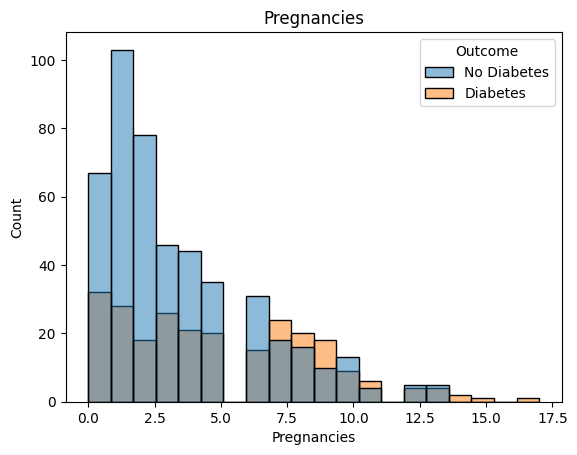

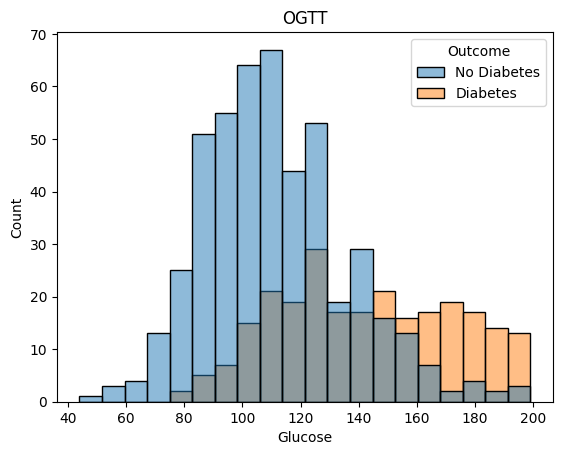

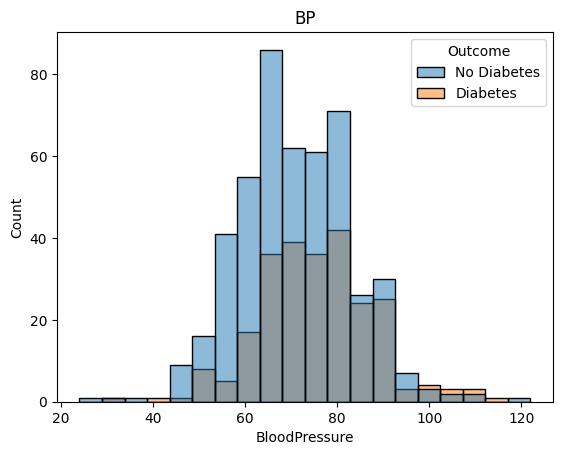

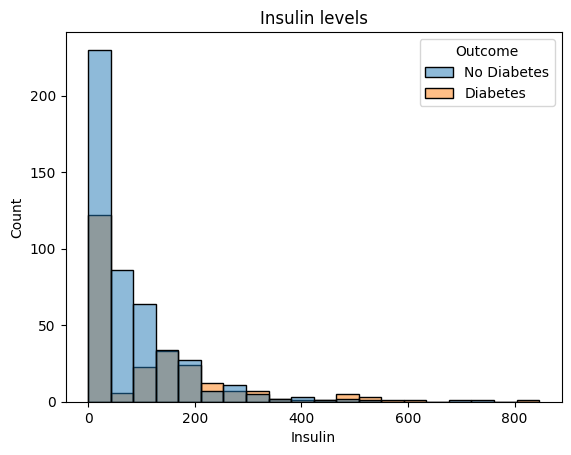

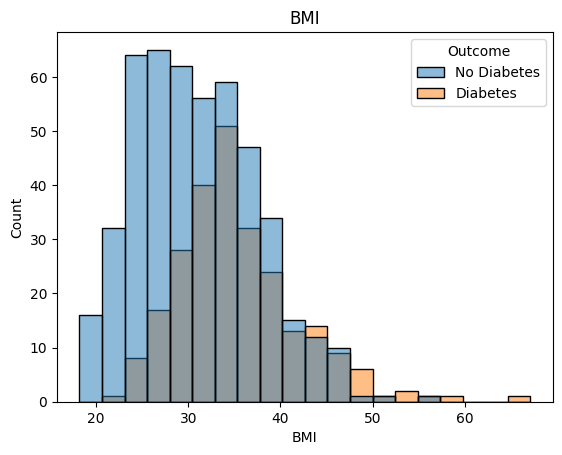

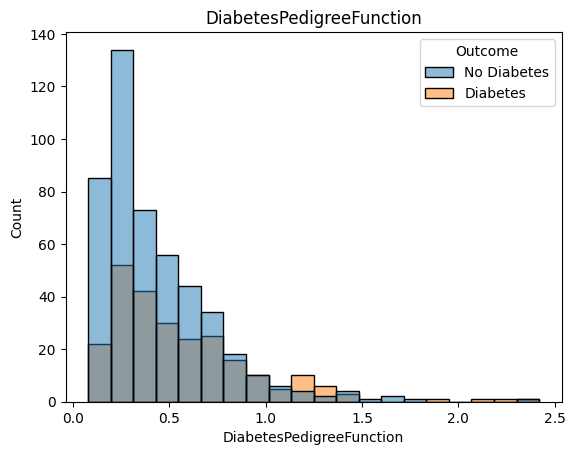

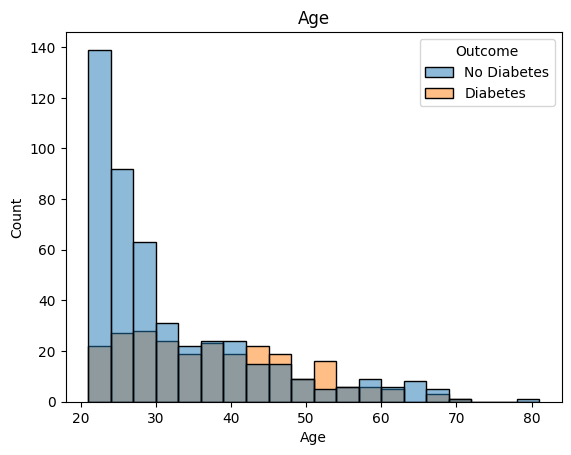

In [21]:
sb.histplot(data=diabetes, x='Pregnancies',bins=20, hue='Outcome')
plt.title('Pregnancies')
plt.show()
sb.histplot(data=diabetes, x='Glucose',bins=20, hue='Outcome' )
plt.title('OGTT')
plt.show()
sb.histplot(data=diabetes, x='BloodPressure',bins=20 , hue='Outcome')
plt.title('BP')
plt.show()
sb.histplot(data=diabetes, x='Insulin',bins=20, hue='Outcome' )
plt.title('Insulin levels')
plt.show()
sb.histplot(data=diabetes, x='BMI',bins=20 , hue='Outcome')
plt.title('BMI')
plt.show()
sb.histplot(data=diabetes, x='DiabetesPedigreeFunction',bins=20 , hue='Outcome')
plt.title('DiabetesPedigreeFunction')
plt.show()
sb.histplot(data=diabetes, x='Age',bins=20 , hue='Outcome')
plt.title('Age')
plt.show()



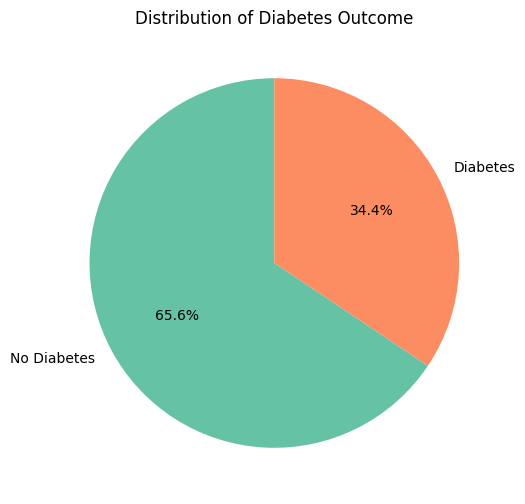

In [22]:
# Count the occurrences of each unique value in the 'Outcome' column
outcome_counts = diabetes['Outcome'].value_counts()

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(outcome_counts, labels=outcome_counts.index, autopct='%1.1f%%', startangle=90, colors=['#66c2a5', '#fc8d62'])
plt.title('Distribution of Diabetes Outcome')
plt.show()

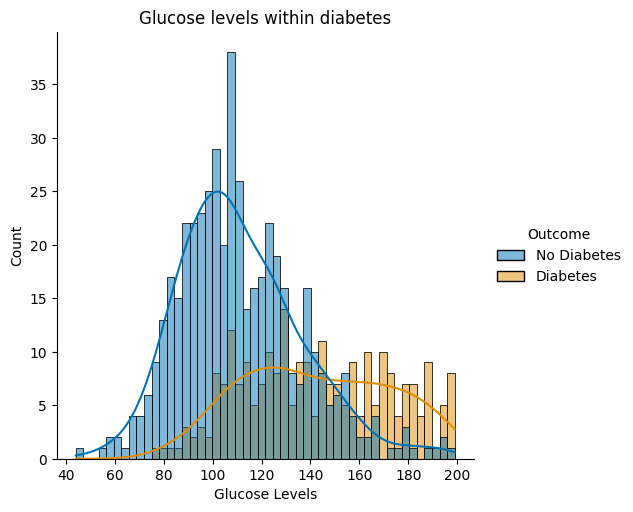

In [23]:
#checking the correlation and distribution between glucose levels' and Outcome' diabetes and non diabetes:
sb.displot(data=diabetes,x='Glucose',hue = 'Outcome',kde= True, bins=50, palette='colorblind')
plt.title('Glucose levels within diabetes')
plt.xlabel('Glucose Levels')
plt.show()


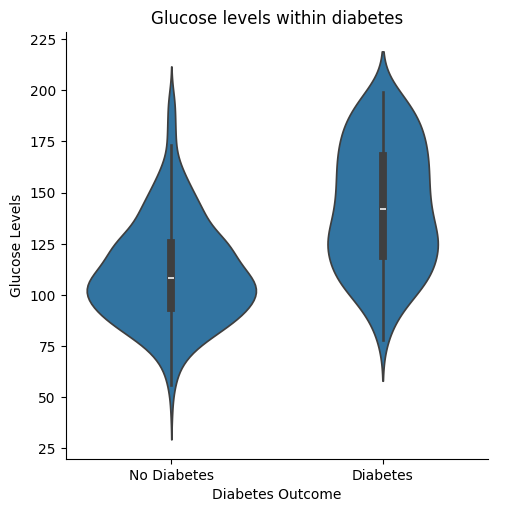

In [24]:
#CHECK correlation between Glucose and diabetes in  other way
sb.catplot(data=diabetes,x="Outcome",y='Glucose',kind='violin')
plt.title('Glucose levels within diabetes')
plt.xlabel('Diabetes Outcome')
plt.ylabel('Glucose Levels')
plt.show()

In [25]:
#CHECK correlation between Glucose and diabetes in  other way
glu = diabetes.groupby('Outcome')['Glucose']


/var/folders/k6/p1x84vks70j3nkmshz1mkvpc0000gn/T/ipykernel_23353/1052030205.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  glu = diabetes.groupby('Outcome')['Glucose']


In [26]:
glu.describe()

,count,mean,std,min,25%,50%,75%,max
Outcome,,,,,,,,
No Diabetes,475.0,111.016842,25.010709,44.0,93.5,108.0,125.5,197.0
Diabetes,249.0,142.610442,30.058895,78.0,119.0,142.0,168.0,199.0


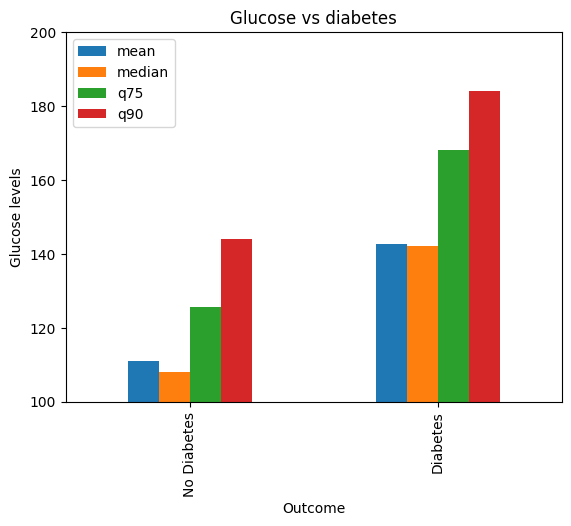

In [27]:
glu.agg(mean='mean', median='median', q75=lambda x: x.quantile(0.75),q90=lambda x: x.quantile(0.90)).plot(kind='bar')
plt.ylabel('Glucose levels')
plt.title('Glucose vs diabetes' )
plt.ylim(100,200)
plt.show()


#### conclusion: 
##### 1-we see that diabetic people have a higher blood glucose levels than non-diabetic. 
##### 2-WE HAVE PRIMARY CORRELATION BETWEEN BLOOD GLUCOSE AND DIABETES

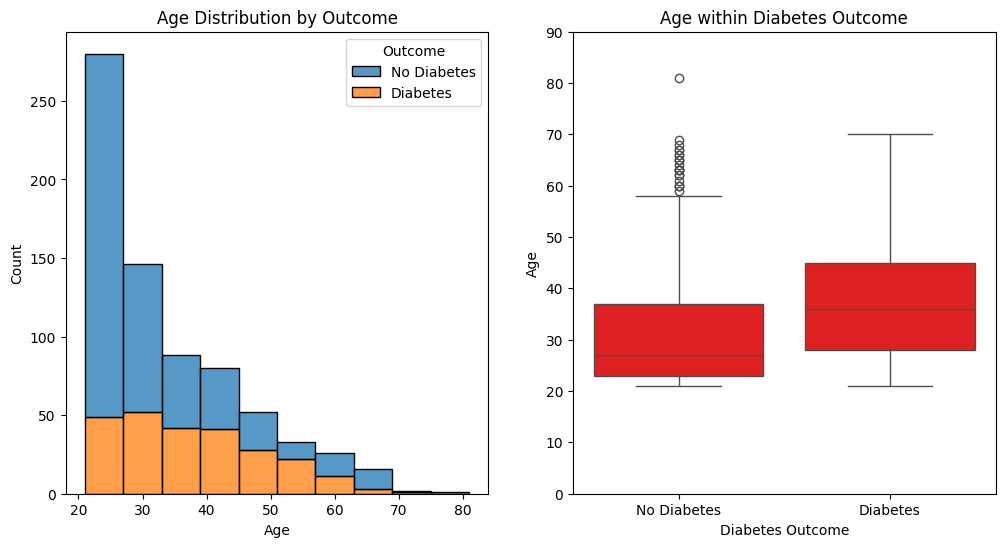

In [28]:
#checking the distribuation and correlation and distribution of Age in diabetes and non diabetes
plt.figure(plt.figure(figsize=(12, 6)))
plt.subplot(1, 2, 1)
sb.histplot(data=diabetes, x='Age', bins=10, hue='Outcome', multiple='stack')
plt.title('Age Distribution by Outcome')
plt.xlabel('Age')
plt.ylabel('Count')

# Second plot: Boxplot on the right
plt.subplot(1, 2, 2)
sb.boxplot(data=diabetes, x='Outcome', y='Age', color='red')
plt.title('Age within Diabetes Outcome')
plt.xlabel('Diabetes Outcome')
plt.ylabel('Age')
plt.ylim(0, 90)
plt.show()

#### conclusion: no obveious correlation between age and diabetes

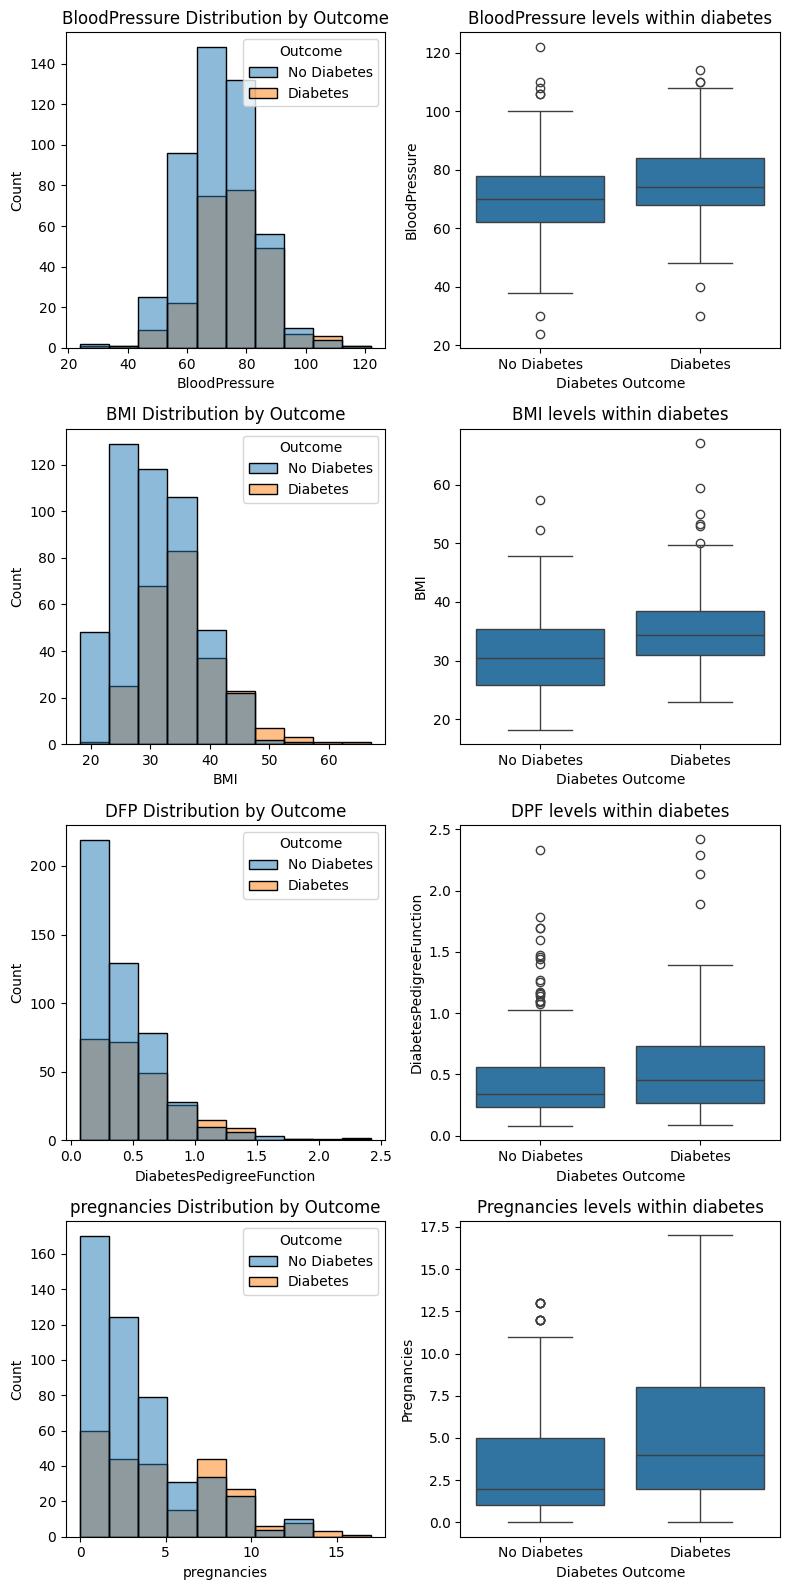

In [29]:
#checking the correlation and distribution of blood pressure, BMI, DiabetesPedigreeFunction, pregnancies in diabetes and non diabetes
plt.figure(figsize=(8, 16))
plt.subplot(4, 2, 1)
sb.histplot(data=diabetes, x='BloodPressure',bins=10, hue='Outcome' )
plt.title('BloodPressure Distribution by Outcome')
plt.xlabel('BloodPressure')
plt.ylabel('Count')
plt.subplot(4, 2, 2)
sb.boxplot(data=diabetes,x="Outcome",y='BloodPressure')
plt.title('BloodPressure levels within diabetes')
plt.xlabel('Diabetes Outcome')
plt.ylabel('BloodPressure')
plt.subplot(4, 2, 3)
sb.histplot(data=diabetes, x='BMI',bins=10, hue='Outcome' )
plt.title('BMI Distribution by Outcome')
plt.xlabel('BMI')
plt.ylabel('Count')
plt.subplot(4, 2, 4)
sb.boxplot(data=diabetes,x="Outcome",y='BMI')
plt.title('BMI levels within diabetes')
plt.xlabel('Diabetes Outcome')
plt.ylabel('BMI')
plt.subplot(4, 2, 5)
sb.histplot(data=diabetes, x='DiabetesPedigreeFunction',bins=10, hue='Outcome' )
plt.title('DFP Distribution by Outcome')
plt.xlabel('DiabetesPedigreeFunction')
plt.ylabel('Count')
plt.subplot(4, 2, 6)
sb.boxplot(data=diabetes,x="Outcome",y='DiabetesPedigreeFunction')
plt.title('DPF levels within diabetes')
plt.xlabel('Diabetes Outcome')
plt.ylabel('DiabetesPedigreeFunction')
plt.subplot(4, 2, 7)
sb.histplot(data=diabetes, x='Pregnancies',bins=10, hue='Outcome' )
plt.title('pregnancies Distribution by Outcome')
plt.xlabel('pregnancies')
plt.ylabel('Count')
plt.subplot(4, 2, 8)
sb.boxplot(data=diabetes,x="Outcome",y='Pregnancies')
plt.title('Pregnancies levels within diabetes')
plt.xlabel('Diabetes Outcome')
plt.ylabel('Pregnancies')
plt.tight_layout()
plt.show()

#### Conclution: it look like no primary correltion between BMI,Bloodpressure and DiabetesPedigreeFunction with diabetes.


In [30]:
#As only glucose levels have primary correlation with diabetes, lest check if any of the parametes have correlation with gluscose levels

<Axes: >

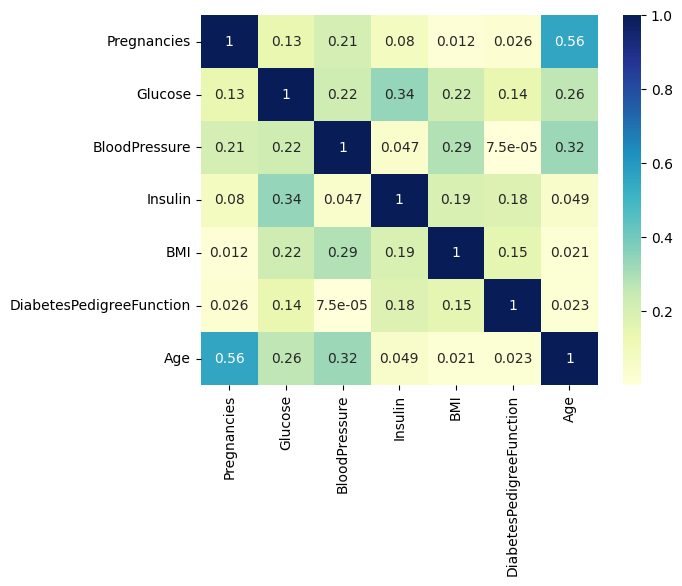

In [31]:
sb.heatmap(diabetes.corr(numeric_only=True).abs(), annot=True, cmap="YlGnBu")

In [32]:
#it looks that there a correlation between Insulin and Glucose (0.34)
#lets explore it more

In [33]:
diabetes['Insulin'].value_counts()



Insulin
0      332
105     11
130      9
140      9
120      8
      ... 
73       1
171      1
255      1
52       1
112      1
Name: count, Length: 185, dtype: int64

In [34]:
#firt we see many coulmns is insulin with '0', we cant use it in the analysis as it affects the correct data

In [35]:
#sorting the data and using onlu coulmns where insulin levels are not 0
mask= diabetes[diabetes['Insulin'] != 0]


In [36]:
mask.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 3 to 765
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Pregnancies               392 non-null    int64   
 1   Glucose                   392 non-null    int64   
 2   BloodPressure             392 non-null    int64   
 3   Insulin                   392 non-null    int64   
 4   BMI                       392 non-null    float64 
 5   DiabetesPedigreeFunction  392 non-null    float64 
 6   Age                       392 non-null    int64   
 7   Outcome                   392 non-null    category
dtypes: category(1), float64(2), int64(5)
memory usage: 25.0 KB


In [37]:
mask.describe (include='all')

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No Diabetes
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,262
mean,3.301020,122.627551,70.663265,156.056122,33.086224,0.523046,30.864796,NaN
std,3.211424,30.860781,12.496092,118.841690,7.027659,0.345488,10.200777,NaN
min,0.000000,56.000000,24.000000,14.000000,18.200000,0.085000,21.000000,NaN
25%,1.000000,99.000000,62.000000,76.750000,28.400000,0.269750,23.000000,NaN
50%,2.000000,119.000000,70.000000,125.500000,33.200000,0.449500,27.000000,NaN
75%,5.000000,143.000000,78.000000,190.000000,37.100000,0.687000,36.000000,NaN


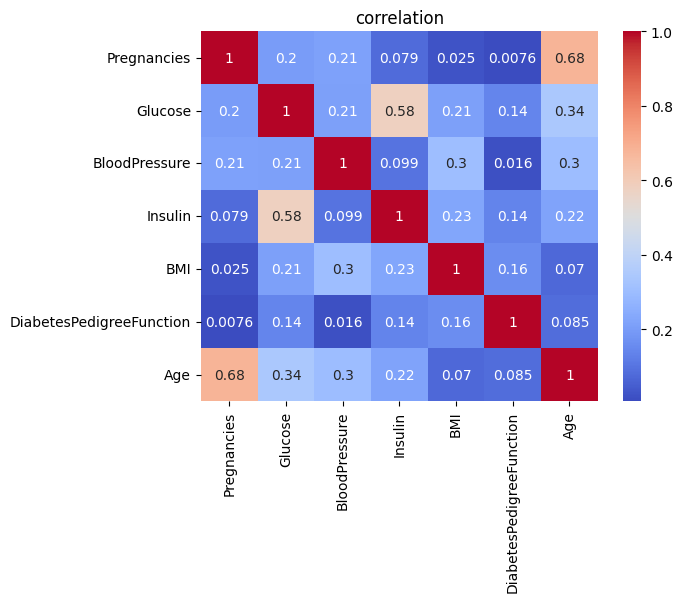

In [38]:
sb.heatmap(mask.corr(numeric_only=True).abs(), annot=True, cmap="coolwarm")
plt.title('correlation')
plt.show()

In [40]:

ins= mask.groupby('Outcome')['Insulin'].agg(mean='mean', median='median', q75=lambda x: x.quantile(0.75),q90=lambda x: x.quantile(0.90))


/var/folders/k6/p1x84vks70j3nkmshz1mkvpc0000gn/T/ipykernel_23353/3269975401.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ins= mask.groupby('Outcome')['Insulin'].agg(mean='mean', median='median', q75=lambda x: x.quantile(0.75),q90=lambda x: x.quantile(0.90))


In [41]:
ins

,mean,median,q75,q90
Outcome,,,,
No Diabetes,130.854962,105.0,163.75,253.5
Diabetes,206.846154,169.5,239.25,372.2


In [42]:
# Reset the index to make the Outcome a column
ins = ins.reset_index()


In [43]:
ins

,Outcome,mean,median,q75,q90
0,No Diabetes,130.854962,105.0,163.75,253.5
1,Diabetes,206.846154,169.5,239.25,372.2


/var/folders/k6/p1x84vks70j3nkmshz1mkvpc0000gn/T/ipykernel_23353/3948430057.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.violinplot(x='Outcome', y='Insulin', data=mask, palette="Set2", inner="quart")


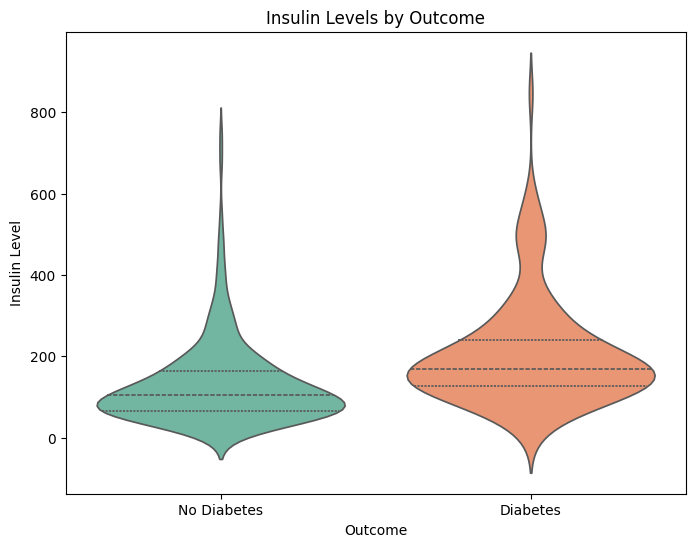

In [44]:
#visualize distribution of 'Insulin' by 'Outcome'
plt.figure(figsize=(8, 6))

sb.violinplot(x='Outcome', y='Insulin', data=mask, palette="Set2", inner="quart")

plt.title('Insulin Levels by Outcome')
plt.ylabel('Insulin Level')
plt.xlabel('Outcome')
plt.xticks([0, 1], ['No Diabetes', 'Diabetes'])

plt.show()


#### conclutions: no obvious correlation between insulin and glucose, more data should be added to database, mainly from diabetic people